<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Spotify_User_Behavior_Analysis_EDA_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Spotify_data.xlsx')

In [ ]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
df.describe()

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [ ]:
df.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

<Axes: ylabel='Gender'>

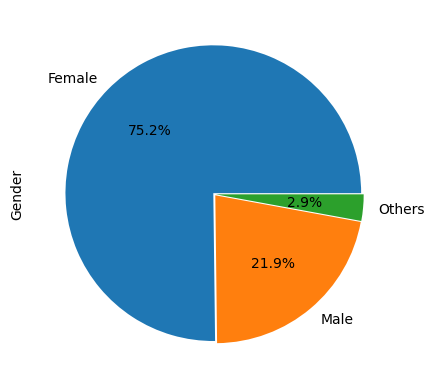

In [ ]:
df['Gender'].value_counts().plot.pie(explode = [0.01, 0.01, 0.01], autopct='%1.1f%%')

Text(0.5, 1.0, 'Pemium subscription willingness')

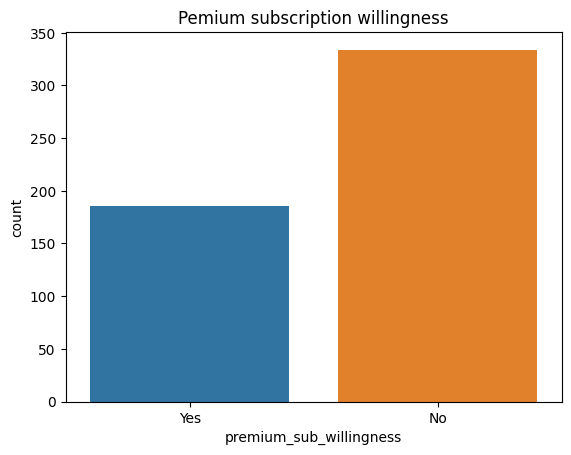

In [ ]:
sns.countplot(x = df['premium_sub_willingness'])
plt.title('Pemium subscription willingness')

<Axes: xlabel='premium_sub_willingness', ylabel='count'>

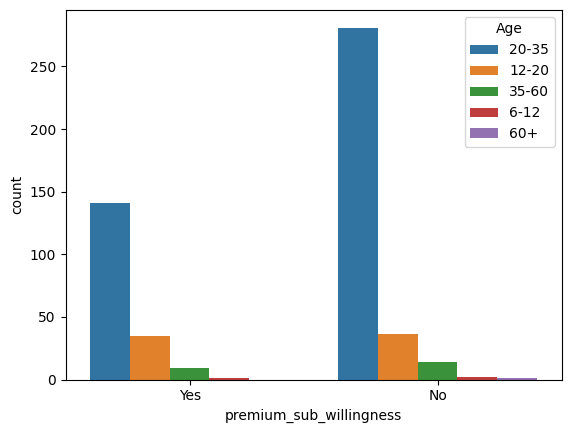

In [ ]:
#willingness to take subscription
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

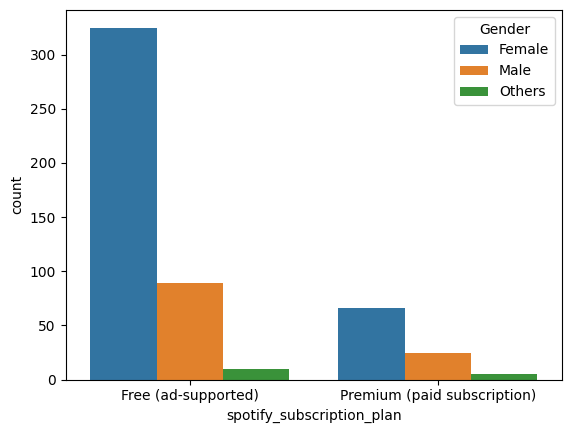

In [ ]:
#spotify subscription plan
sns.countplot(x='spotify_subscription_plan',data=df,hue='Gender')

Text(0.5, 1.0, 'preferred listening content')

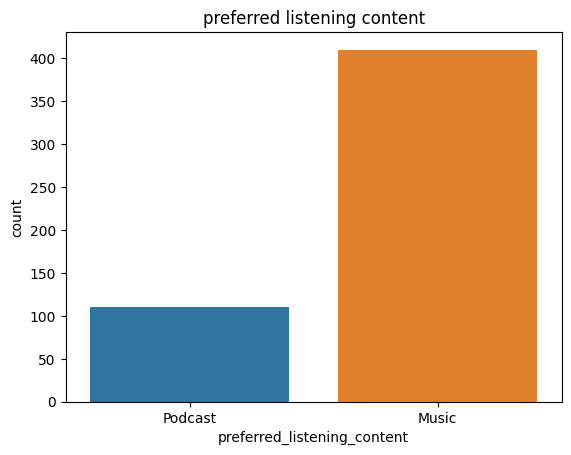

In [ ]:
sns.countplot(x = df['preferred_listening_content'])
plt.title('preferred listening content')

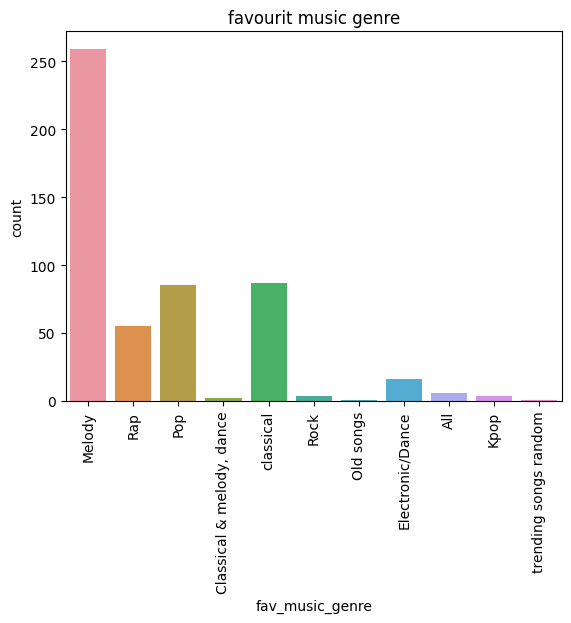

In [ ]:
sns.countplot(x = df['fav_music_genre'])
plt.title('favourit music genre')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'music time slot')

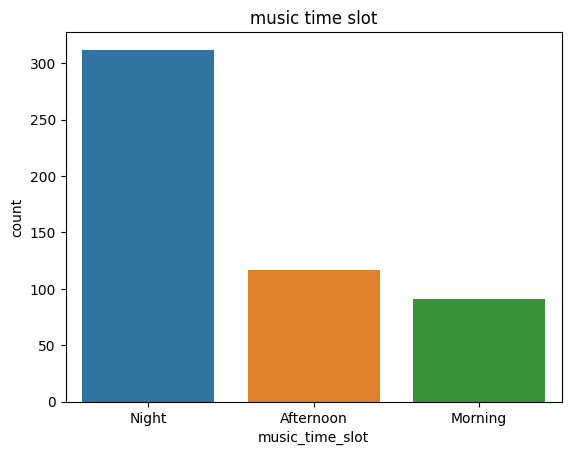

In [ ]:
sns.countplot(x = df['music_time_slot'])
plt.title('music time slot')

Text(0.5, 1.0, 'music rating')

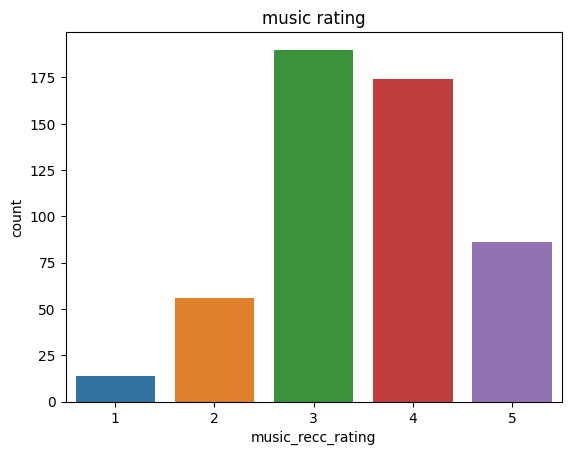

In [ ]:
sns.countplot(x = df['music_recc_rating'])
plt.title('music rating')

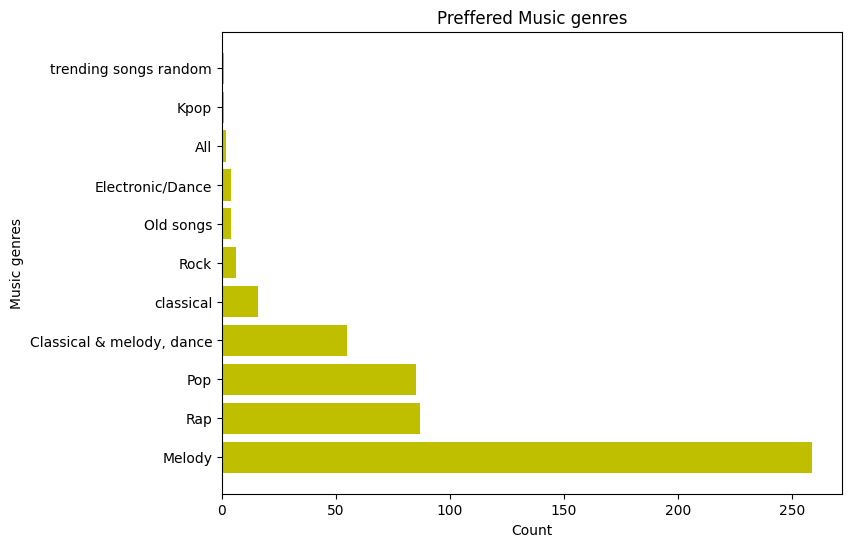

In [ ]:
#fav genre
fig,ax=plt.subplots(figsize=(8,6))
y2=df['fav_music_genre'].value_counts().values
x2=df['fav_music_genre'].unique()
plt.barh(x2,y2,color='y')
plt.xlabel('Count')
plt.ylabel('Music genres')
plt.title('Preffered Music genres')
plt.show()

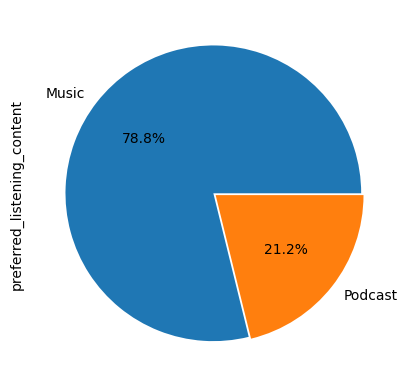

In [ ]:
#fav lis content
y3=df['preferred_listening_content'].value_counts().plot.pie(explode = [0.01, 0.01], autopct = '%1.1f%%')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,0,3,4,0,1,1,1,4,2,8,34,4,3,0,1,2,0,0,1
1,0,1,3,0,0,1,2,1,7,0,10,32,4,2,4,1,2,0,2,2
2,2,2,1,4,0,1,4,1,6,2,0,19,4,4,2,17,2,1,0,2
3,1,0,0,11,0,0,3,0,4,2,3,13,13,4,1,12,3,1,2,1
4,1,0,0,6,0,0,3,0,4,2,0,34,13,4,3,10,4,2,0,1


<Axes: >

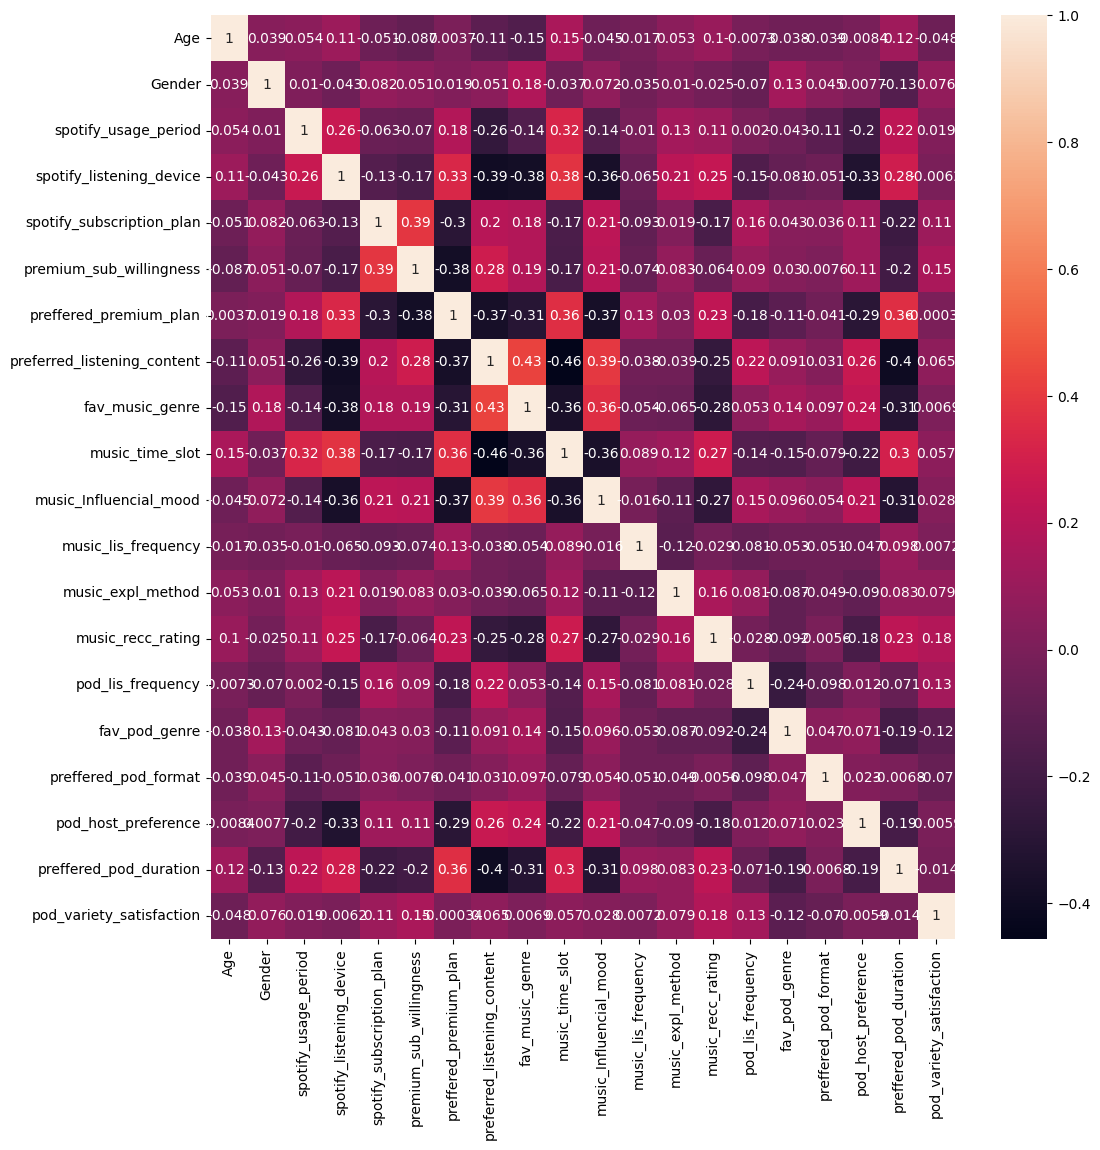

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

**Key Findings from Exploratory Data Analysis**

* The Age group that uses spotify more is between 20-35 followed by 12-20.

* A bigger part of the users comprises of Females than males in my dataset.

* Most of the users prefer free ad supported plan than premium plans and premium users are more of females.

* People between the age group 20-35 uses more of premium plans.

* 35.8 percentage of people are willing to take premium and also willing to continue with the premium subscription plan.

* Most of the people prefer to listen to music than podcast.

* Their favourite music genre is melody.

* Most of the users listens to songs using spotify recommendation and they have given a rating of 3 .

In [ ]:
#Splitting the dataset for chisquare test
X=df.drop(['premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       100
           1       0.79      0.59      0.67        56

    accuracy                           0.79       156
   macro avg       0.79      0.75      0.76       156
weighted avg       0.79      0.79      0.79       156



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.69      0.55      0.61        56

    accuracy                           0.75       156
   macro avg       0.73      0.71      0.71       156
weighted avg       0.74      0.75      0.74       156



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.70      0.73        56

    accuracy                           0.81       156
   macro avg       0.80      0.79      0.79       156
weighted avg       0.81      0.81      0.81       156



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.68      0.64      0.66        56

    accuracy                           0.76       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.76      0.76      0.76       156



In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       100
           1       0.74      0.71      0.73        56

    accuracy                           0.81       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.81      0.81      0.81       156



In [ ]:
import xgboost as xgb
model = xgb.XGBRFClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       100
           1       0.70      0.71      0.71        56

    accuracy                           0.79       156
   macro avg       0.77      0.77      0.77       156
weighted avg       0.79      0.79      0.79       156

